In [1]:
import torch
from torch import nn

In [2]:
import sys
sys.path.append('../../Scripts')

from cnnArch import ConvolutionalNeuralNetwork
from loadData import getTrainDataLoader, getValDataLoader
from trainTestValFunctions import train_model, validate_model
from helperFunctions import plotLoss
from LoadSaveModel import logLoss, saveModel


# Set Device as GPU if available

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Create Model Name (For saving and logging progress)

In [4]:
model_name = "CNNv1"

# Initialize Model, Batch Size, and Learning Rate

In [5]:
model = ConvolutionalNeuralNetwork().to(device)
batch_size = 64
learning_rate = 1e-4

# Initialize DataLoaders

In [6]:
train_dataloader = getTrainDataLoader(batch_size)
val_dataloader = getValDataLoader(batch_size)

# Define Loss Function and Optimizer

In [7]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train Model

## Training loop 

In [26]:
epochs = 4
train_loss_history = []
val_loss_history = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    training = train_model(train_dataloader, model, loss_fn, optimizer,batch_size)
    validation = validate_model(val_dataloader, model, loss_fn)
    train_loss_history.append(validation)
    val_loss_history.append(training)
print("Done!")

Epoch 1
-------------------------------
loss: 0.825273  [   64/ 7624]
loss: 0.918767  [ 6464/ 7624]
Average Loss: 1.1240423634648322
Validation Error: 
 Accuracy: 75.1%, Avg loss: 1.043651 

Epoch 2
-------------------------------
loss: 1.205687  [   64/ 7624]
loss: 1.398822  [ 6464/ 7624]
Average Loss: 1.071091743806998
Validation Error: 
 Accuracy: 75.5%, Avg loss: 1.055000 

Epoch 3
-------------------------------
loss: 0.906278  [   64/ 7624]
loss: 1.028526  [ 6464/ 7624]
Average Loss: 1.0042617281277975
Validation Error: 
 Accuracy: 77.7%, Avg loss: 0.959593 

Epoch 4
-------------------------------
loss: 0.847328  [   64/ 7624]
loss: 0.882164  [ 6464/ 7624]
Average Loss: 0.970009217162927
Validation Error: 
 Accuracy: 78.1%, Avg loss: 1.011324 

Done!


# Log Loss

In [27]:
logLoss(model_name, train_loss_history, val_loss_history)

# Visualize Training and Validation Loss

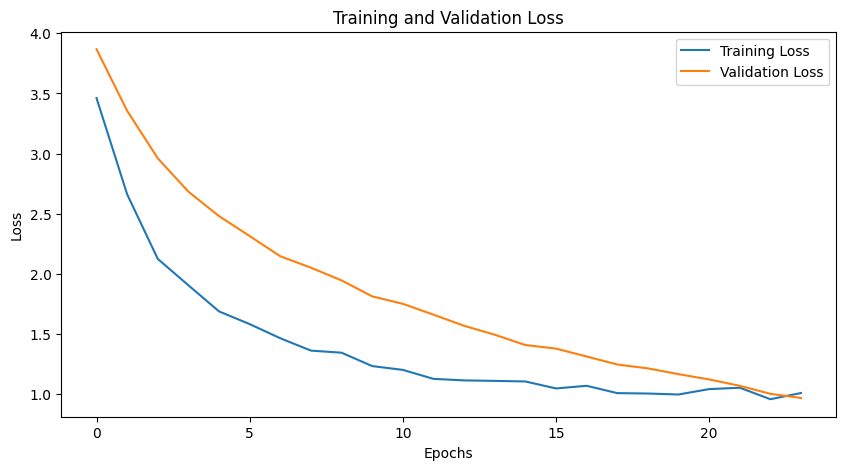

In [28]:
plotLoss(model_name)

# Save Model 

In [29]:
saveModel(model, model_name)

Model saved successfully!
